1/1 [==============================] - 0s 63ms/step
Data input: [10, 20, 30]
Nilai sebenarnya: 50
Nilai prediksi: 57.08995

Data input: [15, 25, 35]
Nilai sebenarnya: 60
Nilai prediksi: 71.99624

Data input: [12, 18, 28]
Nilai sebenarnya: 70
Nilai prediksi: 54.924164

Data input: [8, 16, 24]
Nilai sebenarnya: 55
Nilai prediksi: 45.880653



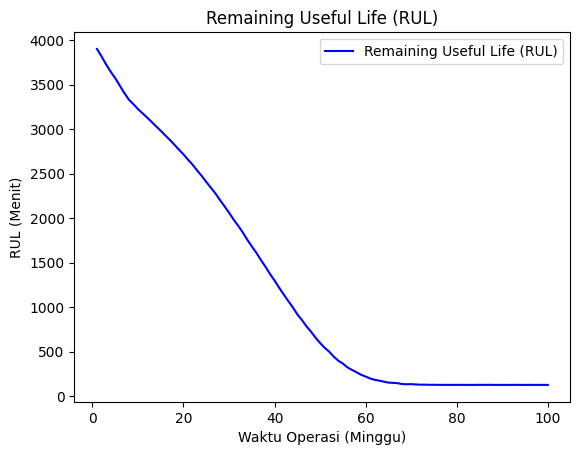

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Tujuan penggunaan JST dengan turunan kedua dan menentukan RUL alat
# Data input dan output
x = [[10, 20, 30], [15, 25, 35], [12, 18, 28], [8, 16, 24]]
output_data = [50, 60, 70, 55]

# Fungsi aktivasi sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Fungsi turunan sigmoid
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Fungsi turunan kedua sigmoid
def sigmoid_second_derivative(x):
    return sigmoid_derivative(x) * (1 - 2 * sigmoid(x))


# Membangun model JST dengan turunan kedua
model = Sequential()
model.add(Dense(10, input_dim=3, activation='relu'))  # Hidden layer pertama
model.add(Dense(10, activation='relu'))  # Hidden layer kedua
model.add(Dense(1))  # Output layer

# Menggunakan turunan kedua dalam model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# Melatih model dengan turunan kedua dan optimisasi alat
history = model.fit(x, output_data, epochs=100, batch_size=1, verbose=0)

# Menggunakan model untuk memprediksi nilai
predicted_output = model.predict(x)

# Menampilkan hasil prediksi dan analisis
for i in range(len(predicted_output)):
    print("Data input:", x[i])
    print("Nilai sebenarnya:", output_data[i])
    print("Nilai prediksi:", predicted_output[i][0])
    print()

# Melakukan analisis performa model, seperti plot loss function
import matplotlib.pyplot as plt

loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Remaining Useful Life (RUL)')
plt.title('Remaining Useful Life (RUL)')
plt.xlabel('Waktu Operasi (Minggu)')
plt.ylabel('RUL (Menit)')
plt.legend()
plt.show()